In [ ]:
# Compare average monthly time series of hydroclimate variable of interest 
# Here CESM and reanalysis that have alreayd had the monthly time series extracted and saved as a timeseries in a .txt file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from glob import glob
import os
import re
from datetime import datetime
import math

In [2]:
# Specify variable names, used in directory names
chosen_var_CESM = 'soilmoisture'
chosen_var_reanalysis = 'swvl1'

In [3]:
# specify the directories that the two datasets to be compared are saved in.
#dir= '/Volumes/MCO_SSD/data/subbasin_data/CESM/QRUNOFF/grouped_subbasins/east_west/*.txt'
#dir2 = '/Volumes/MCO_SSD/data/subbasin_data/ERA5/runoff/*.txt'
#dir3 = '/Volumes/MCO_SSD/data/subbasin_data/ERA5/runoff/grouped_subbasins/east_west/*.txt'

# specify the directories that the datasets to be compared are saved in.
dir= f'/Volumes/MCO_SSD/data/subbasin_data/CESM/{chosen_var_CESM}/grouped_subbasins/east_west/*.txt'
dir2 = f'/Volumes/MCO_SSD/data/subbasin_data/CESM/{chosen_var_CESM}/*.txt'
dir5 = f'/Volumes/MCO_SSD/data/subbasin_data/CESM/{chosen_var_CESM}/grouped_subbasins/entirebasin/*.txt'

dir3 = f'/Volumes/MCO_SSD/data/subbasin_data/ERA5/{chosen_var_reanalysis}/grouped_subbasins/east_west/*.txt'
dir4 = f'/Volumes/MCO_SSD/data/subbasin_data/ERA5/{chosen_var_reanalysis}/*.txt'
dir6 = f'/Volumes/MCO_SSD/data/subbasin_data/ERA5/{chosen_var_reanalysis}/grouped_subbasins/entirebasin/*.txt'


In [4]:
# get list of all files for the two categories of datasets. save each of these as a list to be used in the loop
dir_list = glob(dir, recursive=True)
dir_list2 = glob(dir2, recursive=True)
dir_list3 = glob(dir3, recursive=True)
dir_list4 = glob(dir4, recursive=True)
dir_list5 = glob(dir5, recursive=True)
dir_list6 = glob(dir6, recursive=True)

In [5]:
# Basin list
# keep in this order, and add full basin at the end, because it determines the order of the plotting for the heatmap (based on index number here)

#subbasin_list= ['Arkansas.White.Red.Region','Lower.Mississippi.Region', 'Missouri.Region','Ohio.Region','Tennessee.Region','Upper.Mississippi.Region','Eastern.Mississippi.Basin.Region', 'Western.Mississippi.Basin.Region', 'Entire.Mississippi.Region'] # Entire.Mississippi.Region
#subbasin_list= ['Arkansas.White.Red.Region','Lower.Mississippi.Region', 'Missouri.Region','Ohio.Region','Tennessee.Region','Upper.Mississippi.Region']
subbasin_list= ['Eastern.Mississippi.Basin.Region', 'Western.Mississippi.Basin.Region', 'Entire.Mississippi.Region']

In [7]:
#Check files 

final_filtered_dir_list = []
print(final_filtered_dir_list)
for basin in subbasin_list:
    print(basin)
    filtered_dir_list = [x for x in dir_list if basin in x] 
    #print(filtered_dir_list)
    filtered_dir_list_2 = [y for y in dir_list2 if basin in y] 
    #print(filtered_dir_list_2)
    filtered_dir_list_3 = [z for z in dir_list3 if basin in z]
    #print(filtered_dir_list_3)
    filtered_dir_list_4 = [w for w in dir_list4 if basin in w]
    filtered_dir_list_5 = [u for u in dir_list5 if basin in u]
    filtered_dir_list_6 = [v for v in dir_list6 if basin in v]
    final_filtered_dir_list = filtered_dir_list + filtered_dir_list_3 + filtered_dir_list_2 + filtered_dir_list_4 + filtered_dir_list_5 + filtered_dir_list_6
    #final_filtered_dir_list = filtered_dir_list + filtered_dir_list_3 + filtered_dir_list_5 + filtered_dir_list_6

    final_filtered_dir_list = final_filtered_dir_list
    print(final_filtered_dir_list)

[]
Eastern.Mississippi.Basin.Region
['/Volumes/MCO_SSD/data/subbasin_data/CESM/soilmoisture/grouped_subbasins/east_west/subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_CESM_H2OSOI.txt', '/Volumes/MCO_SSD/data/subbasin_data/ERA5/swvl1/grouped_subbasins/east_west/subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_ERA5_swvl1.txt']
Western.Mississippi.Basin.Region
['/Volumes/MCO_SSD/data/subbasin_data/CESM/soilmoisture/grouped_subbasins/east_west/subbasin_monthly_avg_Western.Mississippi.Basin.Region_CESM_H2OSOI.txt', '/Volumes/MCO_SSD/data/subbasin_data/ERA5/swvl1/grouped_subbasins/east_west/subbasin_monthly_avg_Western.Mississippi.Basin.Region_ERA5_swvl1.txt']
Entire.Mississippi.Region
['/Volumes/MCO_SSD/data/subbasin_data/CESM/soilmoisture/grouped_subbasins/entirebasin/subbasin_monthly_avg_Entire.Mississippi.Region_CESM_H2OSOI.txt', '/Volumes/MCO_SSD/data/subbasin_data/ERA5/swvl1/grouped_subbasins/entirebasin/subbasin_monthly_avg_Entire.Mississippi.Region_ERA5_swvl1.txt']


Eastern.Mississippi.Basin.Region
['/Volumes/MCO_SSD/data/subbasin_data/CESM/soilmoisture/grouped_subbasins/east_west/subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_CESM_H2OSOI.txt', '/Volumes/MCO_SSD/data/subbasin_data/ERA5/swvl1/grouped_subbasins/east_west/subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_ERA5_swvl1.txt']
subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_CESM_H2OSOI.txt
subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_ERA5_swvl1.txt


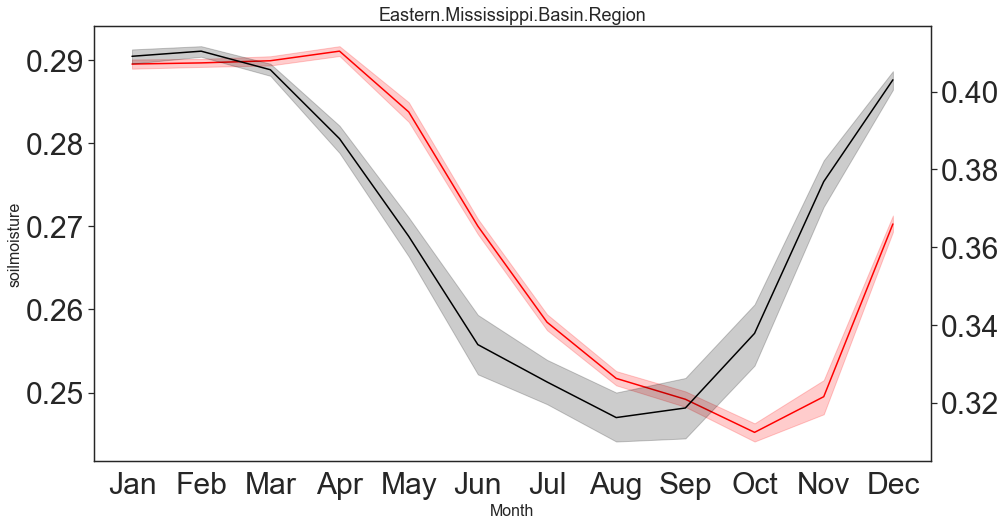

Western.Mississippi.Basin.Region
['/Volumes/MCO_SSD/data/subbasin_data/CESM/soilmoisture/grouped_subbasins/east_west/subbasin_monthly_avg_Western.Mississippi.Basin.Region_CESM_H2OSOI.txt', '/Volumes/MCO_SSD/data/subbasin_data/ERA5/swvl1/grouped_subbasins/east_west/subbasin_monthly_avg_Western.Mississippi.Basin.Region_ERA5_swvl1.txt']
subbasin_monthly_avg_Western.Mississippi.Basin.Region_CESM_H2OSOI.txt
subbasin_monthly_avg_Western.Mississippi.Basin.Region_ERA5_swvl1.txt


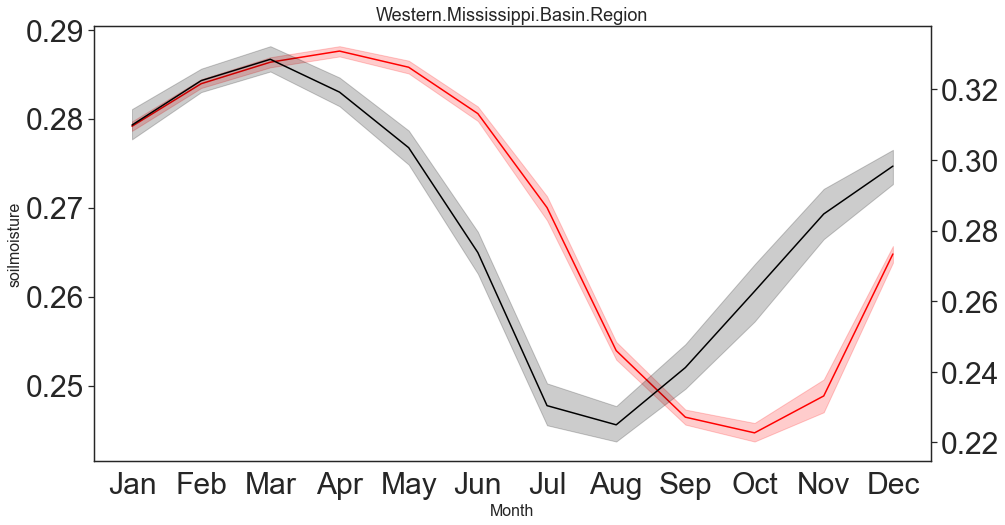

Entire.Mississippi.Region
['/Volumes/MCO_SSD/data/subbasin_data/CESM/soilmoisture/grouped_subbasins/entirebasin/subbasin_monthly_avg_Entire.Mississippi.Region_CESM_H2OSOI.txt', '/Volumes/MCO_SSD/data/subbasin_data/ERA5/swvl1/grouped_subbasins/entirebasin/subbasin_monthly_avg_Entire.Mississippi.Region_ERA5_swvl1.txt']
subbasin_monthly_avg_Entire.Mississippi.Region_CESM_H2OSOI.txt
subbasin_monthly_avg_Entire.Mississippi.Region_ERA5_swvl1.txt


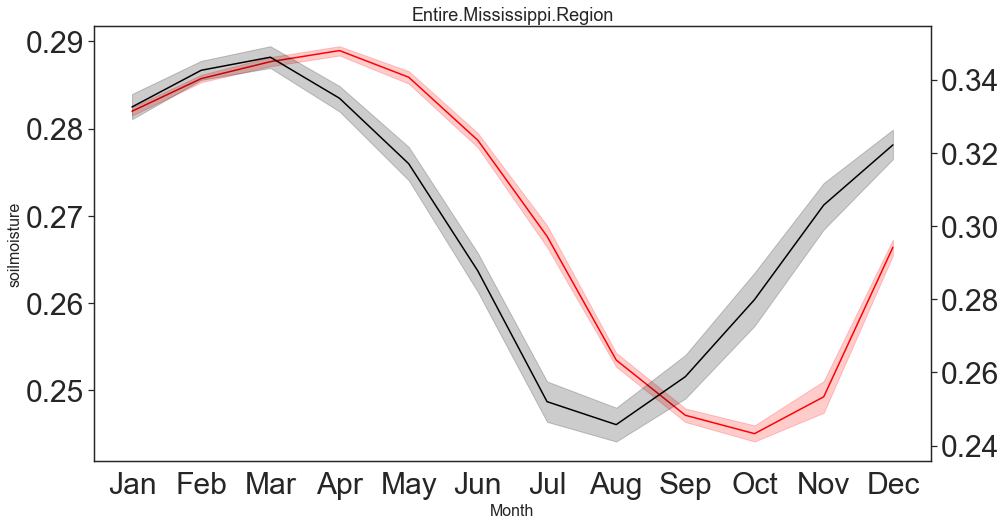

In [9]:
# Setup dfs to calculate monthly averages and then plot
# plot on separate y axes
# initialize i to be able to call the correct file from the filtered directory list
i=0 

for basin in subbasin_list:
    print(basin)
    
    # compile directory lists to access datasets
    filtered_dir_list = [x for x in dir_list if basin in x] 
    filtered_dir_list_2 = [y for y in dir_list2 if basin in y] 
    filtered_dir_list_3 = [z for z in dir_list3 if basin in z]
    filtered_dir_list_4 = [w for w in dir_list4 if basin in w]
    filtered_dir_list_5 = [u for u in dir_list5 if basin in u]
    filtered_dir_list_6 = [v for v in dir_list6 if basin in v]
    final_filtered_dir_list = filtered_dir_list + filtered_dir_list_3 + filtered_dir_list_2 + filtered_dir_list_4 + filtered_dir_list_5 + filtered_dir_list_6

    print(final_filtered_dir_list)
    
    #create dataframe to store the mean values for each subbasin, for plotting
    df_plot = pd.DataFrame()
  
    # setup basins names and directory paths
    basin_name = basin
    directory1 = final_filtered_dir_list[i]
    directory3 = final_filtered_dir_list[i+1]
    name1 = os.path.basename(directory1)
    name3 = os.path.basename(directory3)
    print(name1)
    print(name3)
    
    # setup dataframe1  ## this could be updated to add any other datasets that will be plotted on the same y axis
    df = pd.read_csv(directory1, sep=" ", header = 0)
    df['DATE'] = pd.to_datetime(df['DATE'])
    df = df.set_index('DATE')
    #df['value'] = df['value']/1000 # for CESM runoff related variables, unit is mm/s, divide by 1000 to convert to m/s
    df['value'] = df['value']#*1000 # *1000 to convert CESM snow depth from m to mm
    df_means = df.groupby('month').agg('value').mean()
    df_means = df_means.reset_index()
    df_means.insert(2,'dataset_name',name1) #name = CESM
    #print(df_means)
        
    # setup dataframe3
    df_2 = pd.read_csv(directory3, sep=" ", header = 0)
    df_2['DATE'] = pd.to_datetime(df_2['DATE'])
    df_2 = df_2.set_index('DATE')
    #df_2['value'] = df_2['value']/2.6298e+6 # for ERA5 runoff related variables, unit is m/forecast step (months here), so divide by seconds in a month to convert to m/s
    df_2['value'] = df_2['value']#*1000 # convert ERA5 snow depth from m to mm
    df2_means = df_2.groupby('month').agg('value').mean()
    df2_means = df2_means.reset_index()
    df2_means.insert(2,'dataset_name',name3) #name = ERA5
    #print(df2_means)
  
    #plot the two datasets together for comparison, but with separate y axes 
    sns.set(style='white', rc={'axes.labelsize': 16, 'axes.titlesize': 18, 'font.size': 16, 'xtick.labelsize': 30, 'ytick.labelsize': 30})
    fig = plt.figure(figsize=(15,8))
    ax1 = plt.subplot()
    ax2 = ax1.twinx()
    sns.lineplot(data=df, x="month", y="value", color = "Red", ax=ax1).set(title= basin)
    sns.lineplot(data=df_2, x="month", y="value", color = "black", ax=ax2)
    
    #labeling
    ax1.get_legend() #.remove()
    ax2.get_legend() #.remove()
    ax1.set_ylabel(f"{chosen_var_CESM}", size=16) # Soil Moisture (mm3/mm3)
    ax2.set(ylabel=None)
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
    ax1.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    ax1.set_xlabel("Month", size=16)


    plt.savefig(f'/Volumes/MCO_SSD/data/plots/validation_paper/cesm_v_reanalysis_plot_{chosen_var_CESM}_{basin_name}_largefont.png', dpi=300, bbox_inches='tight')
    plt.show()
    



Eastern.Mississippi.Basin.Region
['/Volumes/MCO_SSD/data/subbasin_data/CESM/soilmoisture/grouped_subbasins/east_west/subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_CESM_H2OSOI.txt', '/Volumes/MCO_SSD/data/subbasin_data/ERA5/swvl1/grouped_subbasins/east_west/subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_ERA5_swvl1.txt']
subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_CESM_H2OSOI.txt
subbasin_monthly_avg_Eastern.Mississippi.Basin.Region_ERA5_swvl1.txt


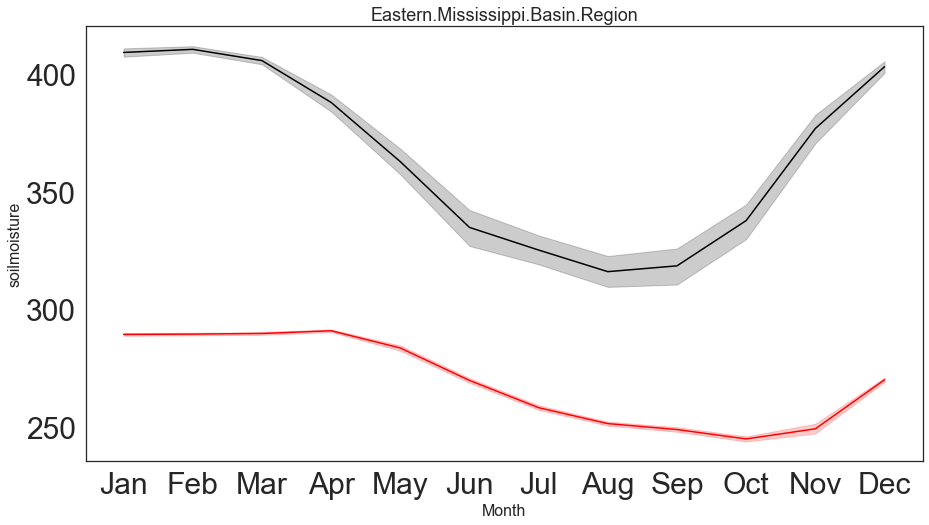

Western.Mississippi.Basin.Region
['/Volumes/MCO_SSD/data/subbasin_data/CESM/soilmoisture/grouped_subbasins/east_west/subbasin_monthly_avg_Western.Mississippi.Basin.Region_CESM_H2OSOI.txt', '/Volumes/MCO_SSD/data/subbasin_data/ERA5/swvl1/grouped_subbasins/east_west/subbasin_monthly_avg_Western.Mississippi.Basin.Region_ERA5_swvl1.txt']
subbasin_monthly_avg_Western.Mississippi.Basin.Region_CESM_H2OSOI.txt
subbasin_monthly_avg_Western.Mississippi.Basin.Region_ERA5_swvl1.txt


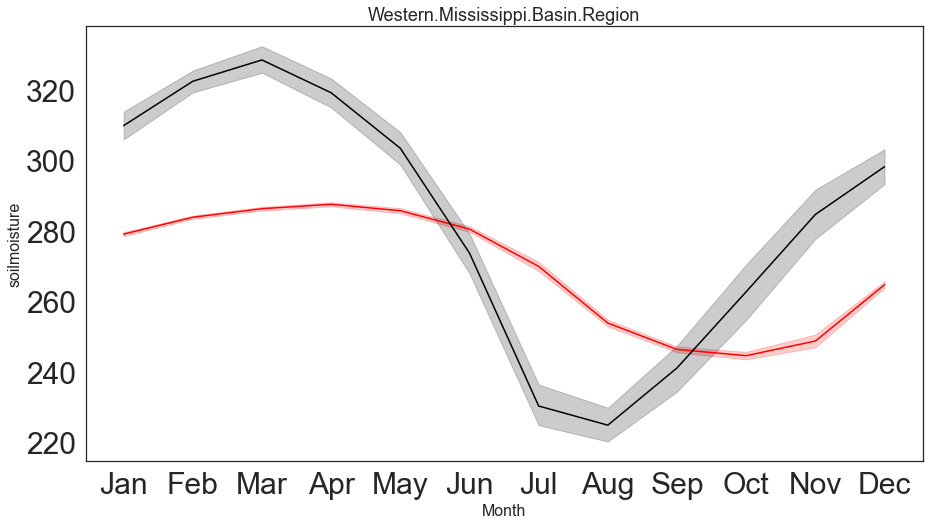

Entire.Mississippi.Region
['/Volumes/MCO_SSD/data/subbasin_data/CESM/soilmoisture/grouped_subbasins/entirebasin/subbasin_monthly_avg_Entire.Mississippi.Region_CESM_H2OSOI.txt', '/Volumes/MCO_SSD/data/subbasin_data/ERA5/swvl1/grouped_subbasins/entirebasin/subbasin_monthly_avg_Entire.Mississippi.Region_ERA5_swvl1.txt']
subbasin_monthly_avg_Entire.Mississippi.Region_CESM_H2OSOI.txt
subbasin_monthly_avg_Entire.Mississippi.Region_ERA5_swvl1.txt


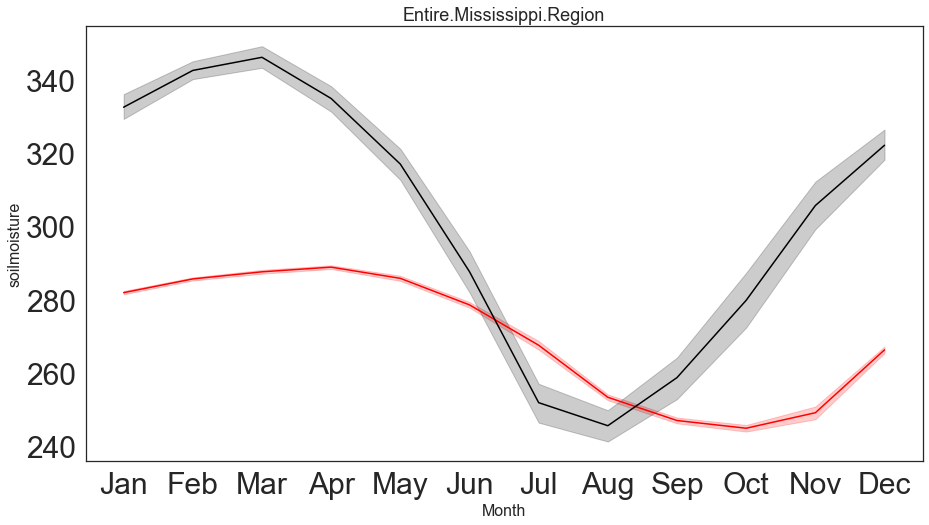

In [12]:
# plot on same y axes
# initialize i to be able to call the correct file from the filtered directory list
i=0 

for basin in subbasin_list:
    print(basin)
    
    # compile directory lists to access datasets
    filtered_dir_list = [x for x in dir_list if basin in x] 
    filtered_dir_list_2 = [y for y in dir_list2 if basin in y] 
    filtered_dir_list_3 = [z for z in dir_list3 if basin in z]
    filtered_dir_list_4 = [w for w in dir_list4 if basin in w]
    filtered_dir_list_5 = [u for u in dir_list5 if basin in u]
    filtered_dir_list_6 = [v for v in dir_list6 if basin in v]
    final_filtered_dir_list = filtered_dir_list + filtered_dir_list_3 + filtered_dir_list_2 + filtered_dir_list_4 + filtered_dir_list_5 + filtered_dir_list_6
    
    #create dataframe to store the mean values for each subbasin, for plotting
    df_plot = pd.DataFrame()
        
    # setup basins names and directory paths
    basin_name = basin
    directory1 = final_filtered_dir_list[i]
    directory3 = final_filtered_dir_list[i+1]
    name1 = os.path.basename(directory1)
    name3 = os.path.basename(directory3)
    print(name1)
    print(name3)
    
    # setup dataframe1  ## this could be updated to add any other datasets that will be plotted on the same y axis
    df = pd.read_csv(directory1, sep=" ", header = 0)
    df['DATE'] = pd.to_datetime(df['DATE'])
    df = df.set_index('DATE')
    #df['value'] = df['value']/1000 # for CESM runoff related variables, unit is mm/s, divide by 1000 to convert to m/s
    #df['value'] = df['value']*2678400 # to convert units from mm/s to mm/month for ET
    df['value'] = df['value']*1000 # for CESM snow depth to convert from m to mm
    df_means = df.groupby('month').agg('value').mean()
    df_means = df_means.reset_index()
    df_means.insert(2,'dataset_name',name1) #name = CESM
        
    # setup dataframe3
    df_2 = pd.read_csv(directory3, sep=" ", header = 0)
    df_2['DATE'] = pd.to_datetime(df_2['DATE'])
    df_2 = df_2.set_index('DATE')
    #df_2['value'] = df_2['value']/2.6298e+6 # for ERA5 runoff related variables, unit is m/forecast step (months here), so divide by seconds in a month to convert to m/s
    #df_2['value'] = df_2['value']*2678400 # to convert units from mm/s to mm/month for ET
    df_2['value'] = df_2['value']#*1000 # for ERA5 snow depth to convert m to mm
    df2_means = df_2.groupby('month').agg('value').mean()
    df2_means = df2_means.reset_index()
    df2_means.insert(2,'dataset_name',name3) #name = ERA5
        
    #plot the two datasets together for comparison, but with separate y axes since the units are different and we are only looking at timing right now
    fig = plt.figure(figsize=(15,8))
    ax1 = plt.subplot()
    sns.lineplot(data=df, x="month", y="value", color = "Red").set(title= basin) #, ax=ax1
    sns.lineplot(data=df_2, x="month", y="value", color = "black") #, ax=ax2
    
    #labeling
    ax1.get_legend() #.remove()
    ax1.set_ylabel(f"{chosen_var_CESM}", size=16)
    plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
    ax1.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
    ax1.set_xlabel("Month", size=16)

    plt.show()
    
